# UTS
Tugas ujian tengah semester mata kuliah proyek sains data diminta untuk melakukan proses klasifikasi teks dimana di dalam tugas ini saya membuat menjadi 4 sub bab :
1. Pre-processing
2. TF-IDF
3. PCA
4. Metode KNN/Naive Bayes

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [105]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Pre-Processing
Pada sub bab yang pertama ini saya akan menjelaskan mengenai proses pre-processing,yaitu :
1. Cleaning

Cleaning adalah menghapus hal-hal yang tidak digunakan seperti tanda baca, angka, tag dan hastag. dalam proses cleaning ini digunakan library regex untuk mencari hal-hal yang diinginkan.
2. Casefolding

Casefolding adalah merubah huruf besar menjadi huruf kecil. proses casefolding menggunakan library nltk.
3. Slangword

Slangword adalah merubah kata-kata singkapan atau kata-kata yang kurang benar dalam kalimat. dalam proses ini menggunakan bantuan kamus dari github. hasilnya berupa list dan data tabel.
4. Tokenizing

Tokenizing adalah memisahkan kalimat menjadi kata-kata berdasarkan spasi. dalam proses tokenizing dilakukan looping setiap datanya untuk dipisahkan menggunakan bantuan library nltk yang menghasilkan list setiap data yang sudah terpisah-pisah katanya.
5. Stopword

Stopword adalah menghapus kata yang tidak penting dalam kalimat. hasil dari tokenize akan dilakukan pengecekan setiap kata dalam data untuk menghapus kata yang tidak perlu. Hasil pengecekan tadi kemudian dikembalikan dalam bentuk list.
6. Stemming

Stemming adalah mengubah kata yang memiliki imbuhan menjadi kata dasar. list yang dihasilkan dari stopword akan dilakukan looping untuk mengecek setiap kata yag ada di dalam data memiliki imbuhan atau tidak dengan menggunakan library dari Sastrawi. hasil dari proses stemming yaitu berupa list kata setiap data yang sudah menjadi baku.

Jika proses pre-processing selesai, maka akan dilakukan join data yang sebelumnya dipisahkan per kata menjadi kalimat utuh lagi.

In [106]:
data = pd.read_csv("/content/drive/MyDrive/Prosaindata/tugas/tugas_psd/dataset-baru.csv")
data

,Unnamed: 0,Abstrak,Kategori
0,0,Sistem informasi akademik (SIAKAD) merupaka...,RPL
1,1,Berjalannya koneksi jaringan komputer dengan l...,RPL
2,2,Web server adalah sebuah perangkat lunak serve...,RPL
3,3,Penjadwalan kuliah di Perguruan Tinggi me...,KOMPUTASI
4,4,Seiring perkembangan teknologi yang ada diduni...,RPL
...,...,...,...
800,804,Investasi saham selama ini memiliki resiko ker...,KOMPUTASI
801,805,Information Retrieval (IR) merupakan pengambil...,KOMPUTASI
802,806,Klasifikasi citra merupakan proses pengelompok...,KOMPUTASI
803,807,Identifikasi atribut pejalan kaki merupakan sa...,KOMPUTASI


In [107]:
#Remove Puncutuation
clean_tag = re.compile('@\S+')
clean_url = re.compile('https?:\/\/.*[\r\n]*')
clean_hastag = re.compile('#\S+')
clean_symbol = re.compile('[^a-zA-Z]')
def clean_punct(text):
    text = clean_tag.sub('', text)
    text = clean_url.sub('', text)
    text = clean_hastag.sub(' ', text)
    text = clean_symbol.sub(' ', text)
    return text
# Buat kolom tambahan untuk data description yang telah diremovepunctuation   
preprocessing = data['Abstrak'].apply(clean_punct)
clean=pd.DataFrame(preprocessing)
clean

,Abstrak
0,Sistem informasi akademik SIAKAD merupaka...
1,Berjalannya koneksi jaringan komputer dengan l...
2,Web server adalah sebuah perangkat lunak serve...
3,Penjadwalan kuliah di Perguruan Tinggi me...
4,Seiring perkembangan teknologi yang ada diduni...
...,...
800,Investasi saham selama ini memiliki resiko ker...
801,Information Retrieval IR merupakan pengambil...
802,Klasifikasi citra merupakan proses pengelompok...
803,Identifikasi atribut pejalan kaki merupakan sa...


In [108]:
def clean_lower(lwr):
    lwr = lwr.lower() # lowercase text
    return lwr
# Buat kolom tambahan untuk data description yang telah dicasefolding  
clean = clean['Abstrak'].apply(clean_lower)
casefolding=pd.DataFrame(clean)
casefolding

,Abstrak
0,sistem informasi akademik siakad merupaka...
1,berjalannya koneksi jaringan komputer dengan l...
2,web server adalah sebuah perangkat lunak serve...
3,penjadwalan kuliah di perguruan tinggi me...
4,seiring perkembangan teknologi yang ada diduni...
...,...
800,investasi saham selama ini memiliki resiko ker...
801,information retrieval ir merupakan pengambil...
802,klasifikasi citra merupakan proses pengelompok...
803,identifikasi atribut pejalan kaki merupakan sa...


In [111]:
slang_dict = pd.read_csv("https://raw.githubusercontent.com/louisowen6/NLP_bahasa_resources/master/combined_slang_words.txt", sep=" ", header=None)

def replace_slang_words(text):
    words = nltk.word_tokenize(text.lower())
    words_filtered = [word for word in words if word not in stopwords.words('indonesian')]
    for i in range(len(words_filtered)):
        if words_filtered[i] in slang_dict:
            words_filtered[i] = slang_dict[words_filtered[i]]
    return ' '.join(words_filtered)

# penggunaan
casefolding=[]
for i in range(len(preprocessing)):
  casefolding.append(preprocessing[i])

slang_words=[]
for i in range(len(casefolding)):
  slang = replace_slang_words(casefolding[i])
  slang_words.append(slang)

slang = pd.DataFrame(slang_words, columns=["Token"])
slang

,Token
0,sistem informasi akademik siakad sistem inform...
1,berjalannya koneksi jaringan komputer lancar g...
2,web server perangkat lunak server berfungsi me...
3,penjadwalan kuliah perguruan kompleks permasal...
4,seiring perkembangan teknologi didunia muncul ...
...,...
800,investasi saham memiliki resiko kerugian perge...
801,information retrieval ir pengambilan informasi...
802,klasifikasi citra proses pengelompokan piksel ...
803,identifikasi atribut pejalan kaki salah peneli...


In [ ]:
tokenize=[]
for i in range(len(slang_words)):
  token=word_tokenize(slang_words[i])
  tokendata = []
  for x in token :
    tokendata.append(x)
  tokenize.append(tokendata)
  print(tokendata)

In [ ]:
stopword=[]
for i in range(len(tokenize)):
  listStopword =  set(stopwords.words('indonesian'))
  removed=[]
  for x in (tokenize[i]):
    if x not in listStopword:
       removed.append(x)
  stopword.append(removed)
  print(removed)

In [ ]:
stemming=[]
for i in range(len(stopword)):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  katastem=[]
  for x in (stopword[i]):
    katastem.append(stemmer.stem(x))
  stemming.append(katastem)
  print(katastem)

In [116]:
join=[]
for i in range(len(stemming)):
  joinkata = ' '.join(stemming[i])
  join.append(joinkata)

hasilpreproses = pd.DataFrame(join, columns=['Abstrak'])
hasilpreproses

,Abstrak
0,sistem informasi akademik siakad sistem inform...
1,jalan koneksi jaring komputer lancar ganggu ha...
2,web server perangkat lunak server fungsi terim...
3,jadwal kuliah guru kompleks masalah variabel t...
4,iring kembang teknologi dunia muncul teknologi...
...,...
800,investasi saham milik resiko rugi gera harga s...
801,information retrieval ir ambil informasi simpa...
802,klasifikasi citra proses kelompok piksel citra...
803,identifikasi atribut pejal kaki salah teliti k...


## TF-TDF
TF-IDF (Term Frequency Inverse Document Frequency) merupakan metode yang digunakan untuk menentukan nilai frekuensi sebuah kata di dalam sebuah dokumen atau artikel dan juga frekuensi di dalam banyak dokumen.
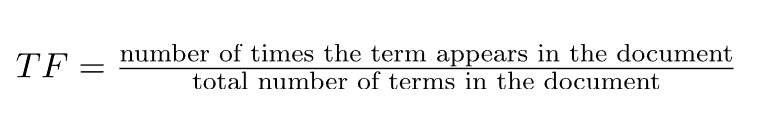
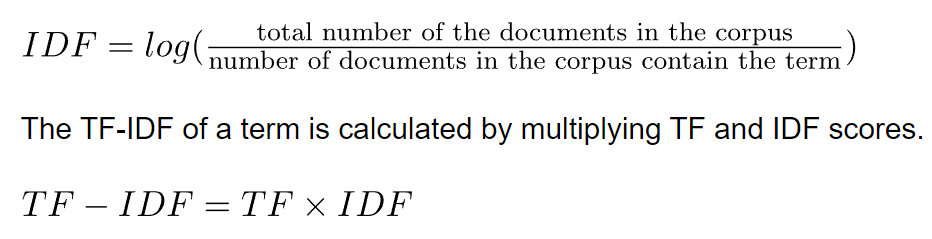

Dalam pengelompokan kata ini saya menggunakan library dari scikit-learn yaitu TfidfVectorizer, prosesnya sebagai berikut:
1. Import library
2. Deklarasikan library
3. Lakukan transformasi data yang sudah dilakukan pre processing
4. Data hasil transformasi dilakukkan konversi menjadi array setiap katanya
5. Selanjutnya dilakukan get_feature_names_out untuk menampung nama setiap fitur yang dihasilkan
6. Hasil akhir data yang sudah dilakukan tf-idf menggunakan library akan dibentuk dalam tabel



In [117]:
tr_idf_model  = TfidfVectorizer()
tf_idf_vector = tr_idf_model.fit_transform(hasilpreproses['Abstrak'])

In [118]:
tf_idf_array = tf_idf_vector.toarray()
 
print(tf_idf_array)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [119]:
words_set = tr_idf_model.get_feature_names_out()
print(words_set)

['aalysis' 'aam' 'abad' ... 'zoom' 'zucara' 'zungu']


In [120]:
df_tf_idf = pd.DataFrame(tf_idf_array, columns = words_set)
 
df_tf_idf

,aalysis,aam,abad,abadi,abai,abdi,ability,abjad,absah,absensi,...,zara,zat,zcz,zf,zona,zone,zoning,zoom,zucara,zungu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## PCA
Principal Component Analysis (PCA) adalah salah satu metode reduksi dimensi pada machine learning. PCA akan memilih œvariabel-variabel yang mampu menjelaskan sebagian besar variabilitas data. PCA mengurangi dimensi dengan membentuk variabel-variabel baru yang disebut Principal Components.

Dalam reduksi dimensi ini saya menggunakan library dari scikit-learn yaitu PCA, prosesnya sebagai berikut:
1. Import library
2. Deklarasikan PCA dengan jumlah parameter untuk banyak fitur hasil reduksi
3. Lakukan transformasi pca pada data yang akan digunakan
4. Simpan hasil transformasi ke dalam bentuk tabel

In [121]:
from sklearn.decomposition import PCA

In [122]:
pca = PCA(n_components=30)
pca_features = pca.fit_transform(df_tf_idf)
pca_df = pd.DataFrame(pca_features)
pca_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.021123,-0.109840,-0.037810,-0.057638,-0.054574,0.039418,-0.080360,0.054618,0.105717,0.173916,...,-0.087080,0.025495,-0.020523,0.057474,-0.032940,0.037491,0.013743,-0.094927,-0.005013,-0.047832
1,-0.024203,-0.028498,-0.019174,-0.098566,-0.005139,0.046712,-0.052426,0.046404,-0.015629,0.000387,...,-0.122596,0.122289,-0.002405,0.027014,0.001868,-0.036040,0.116901,0.203354,0.159938,0.058811
2,-0.030133,-0.020837,-0.052582,-0.113924,-0.066520,0.065033,-0.044695,-0.097525,0.229998,-0.038143,...,-0.004983,-0.013157,0.048034,0.042079,-0.035240,-0.087023,0.083222,0.023575,0.130719,-0.019261
3,-0.027920,-0.031597,-0.034798,-0.029235,0.010322,0.022217,-0.043413,-0.055495,-0.017520,-0.027531,...,0.087926,-0.327220,0.146790,-0.148580,0.337784,0.309741,-0.106343,0.108445,0.085360,0.008001
4,-0.059750,0.059858,0.024871,-0.072946,-0.009371,0.128005,-0.098239,0.075423,-0.053385,-0.142953,...,-0.182986,-0.060314,-0.207022,-0.005505,0.047289,-0.013045,-0.184146,-0.201317,-0.122351,-0.025181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,0.003204,-0.029382,0.006216,-0.022601,-0.028554,0.015015,0.063279,-0.027234,-0.089131,-0.007025,...,0.014627,0.043644,0.026740,0.017612,-0.071321,0.012833,0.012202,-0.016825,-0.027066,0.023602
801,0.006741,-0.020756,-0.038322,-0.058296,-0.069414,0.035265,-0.005638,-0.191617,0.207666,-0.121187,...,0.051672,0.025791,-0.040123,-0.021314,0.052863,-0.047414,-0.056509,-0.017479,-0.029713,-0.017871
802,0.241304,0.046673,-0.035382,0.069556,-0.089967,0.021458,0.073810,-0.059115,-0.073724,0.029671,...,0.028507,0.138829,0.006661,-0.035682,-0.003674,0.107810,-0.003925,-0.010641,-0.098576,-0.086087
803,0.102003,0.011611,-0.008077,0.001517,-0.037185,0.033489,0.106688,-0.007529,-0.079033,-0.038609,...,0.032020,0.240069,0.047964,-0.043302,0.004386,0.166141,0.101932,-0.049358,-0.047574,-0.121092


## Metode KNN/Naive Bayes

1.   KNN

Langkah untuk menghitung dengan metode KNN :
1.   Import library
2.   Split data hasil PCA dan Label
3.  Deklarasikan metode KNN dengan parameter tetangga yang ingin set
4. Mencari prediksi pada data testing
5. Tampilkan nilai akurasi dari data prediksi
6. Tampilkan klasifikasi reprort dari data prediksi


2.   Naive Bayes

Langkah untuk menghitung dengan metode Naive Bayes :
1.   Import library
2.   Split data hasil PCA dan Label
3.  Deklarasikan metode naive bayes
4. Mencari prediksi pada data testing
5. Tampilkan nilai akurasi dari data prediksi
6. Tampilkan klasifikasi reprort dari data prediksi




### KNN

In [123]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [124]:
y = data.Kategori

In [125]:
# split data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(pca_df,y,test_size=0.2,random_state=4)

In [126]:
KNN = KNeighborsClassifier(n_neighbors=6)
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [127]:
X_pred = KNN.predict(X_test)
X_pred

array(['KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI',
       'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI',
       'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'RPL', 'KOMPUTASI',
       'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI',
       'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI',
       'RPL', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI',
       'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'RPL', 'KOMPUTASI', 'RPL',
       'RPL', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'RPL', 'RPL',
       'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'RPL',
       'KOMPUTASI', 'KOMPUTASI', 'RPL', 'KOMPUTASI', 'KOMPUTASI',
       'KOMPUTASI', 'RPL', 'KOMPUTASI', 'KOMPUTASI', 'RPL', 'RPL',
       'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI',
       'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI',
       'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI',
       'RPL', 'RPL', 'KOM

In [128]:
accuracy_score(y_test, X_pred)

0.8571428571428571

In [129]:
print(classification_report(y_test, X_pred))

              precision    recall  f1-score   support

   KOMPUTASI       0.86      0.96      0.90       114
         RPL       0.85      0.62      0.72        47

    accuracy                           0.86       161
   macro avg       0.86      0.79      0.81       161
weighted avg       0.86      0.86      0.85       161



### Naive Bayes

In [130]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

In [131]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

GaussianNB()

In [132]:
X_pred_gaus = gaussian.predict(X_test)
X_pred_gaus

array(['KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI',
       'KOMPUTASI', 'KOMPUTASI', 'RPL', 'KOMPUTASI', 'KOMPUTASI',
       'KOMPUTASI', 'KOMPUTASI', 'RPL', 'RPL', 'KOMPUTASI', 'KOMPUTASI',
       'KOMPUTASI', 'KOMPUTASI', 'RPL', 'KOMPUTASI', 'KOMPUTASI',
       'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'RPL',
       'KOMPUTASI', 'KOMPUTASI', 'RPL', 'KOMPUTASI', 'KOMPUTASI',
       'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'RPL', 'RPL',
       'RPL', 'KOMPUTASI', 'KOMPUTASI', 'RPL', 'RPL', 'KOMPUTASI',
       'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'RPL', 'KOMPUTASI',
       'KOMPUTASI', 'RPL', 'KOMPUTASI', 'RPL', 'KOMPUTASI', 'RPL',
       'KOMPUTASI', 'RPL', 'RPL', 'RPL', 'KOMPUTASI', 'RPL', 'RPL',
       'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI',
       'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'RPL',
       'KOMPUTASI', 'KOMPUTASI', 'RPL', 'RPL', 'KOMPUTASI', 'RPL', 'RPL',
       'KOMPUTASI', 'KOMPUTASI', 'KOMP

In [133]:
accuracy_score(y_test, X_pred_gaus)

0.8260869565217391

In [134]:
print(classification_report(y_test, X_pred_gaus))

              precision    recall  f1-score   support

   KOMPUTASI       0.91      0.84      0.87       114
         RPL       0.67      0.79      0.73        47

    accuracy                           0.83       161
   macro avg       0.79      0.81      0.80       161
weighted avg       0.84      0.83      0.83       161

